#  10주차. 실습과제 
#  파이프라인

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# <font color='red'> 실습

- 미국 패션의류 온라인 업체(Zalando)의 구두와 의류 품목의 흑백 이미지 사진을 학습하여 10 개 유형으로 분류 예측하여 보자. 10개 범주 유형은 다음 그림과 같이 "T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"이다.
- 데이터는 Kaggle 사이트에서 ’minst fashion dataset’으로 검색하여 훈련과 검증데이터 압축파일을 ‘data’ 폴더로 내려받아 압축을 풀고 저장한다.

In [8]:
df = pd.read_csv('../../data/fashion-mnist_test.csv.')

총 70,000개의 이미지 사진이 있고 각 사진은 784개 픽셀(28*28) 로 나누어진다. 각 픽셀은 명암농도 0부터 255까지 값을 갖는다. 훈련데이터(train) 는 60,000개, 검증데이터(test)는 10,000개이다.

In [4]:
df.head()
df.shape

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(10000, 785)

무작위 층화 샘플링으로 실습을 위해 sampling

In [9]:
df = df.sample(frac=0.1)

In [10]:
X = df.drop(['label'], axis=1)
X = X/255
y = df['label']

In [12]:
X
y

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
5830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.000000,...,0.650980,0.439216,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.125490,0.125490,0.235294,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003922,0.003922,...,0.776471,0.686275,0.694118,0.552941,0.0,0.0,0.003922,0.0,0.0,0.0
879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.294118,...,0.678431,0.501961,0.325490,0.074510,0.0,0.0,0.000000,0.0,0.0,0.0
3294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
8085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


5830    4
4610    7
668     8
4750    1
1941    7
       ..
7255    0
879     3
3294    8
8085    8
1977    8
Name: label, Length: 1000, dtype: int64

<Figure size 432x288 with 0 Axes>

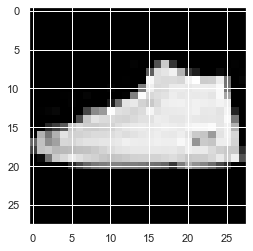

In [11]:
example_index = 223
plt.figure()
_ = plt.imshow(np.reshape(X.values[example_index, :],(28,28)), 'gray')

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [19]:
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=3)
param_grid = {}
gs = GridSearchCV(RandomForestClassifier(), param_grid, cv = kf) 
y_predict = gs.fit(X_train, y_train).predict(X_test)
y_probas = gs.fit(X_train, y_train).predict_proba(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=3)
param_grid = {}
gs = RandomizedSearchCV(RandomForestClassifier(), param_grid, n_iter=10, cv = kf) 
y_predict = gs.fit(X_train, y_train).predict(X_test)
y_probas = gs.fit(X_train, y_train).predict_proba(X_test)

C:\Users\NFSI291\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\NFSI291\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [11]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        19
           1       1.00      0.84      0.91        19
           2       0.79      0.82      0.81        28
           3       0.76      0.88      0.81        25
           4       0.67      0.69      0.68        29
           5       0.86      0.96      0.91        26
           6       0.61      0.46      0.52        24
           7       0.83      0.83      0.83        29
           8       1.00      0.92      0.96        26
           9       0.88      0.84      0.86        25

    accuracy                           0.80       250
   macro avg       0.81      0.80      0.80       250
weighted avg       0.81      0.80      0.80       250



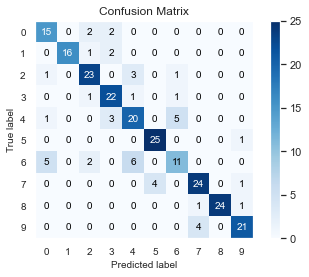

In [12]:
# 시각화 툴
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_predict)

### PCA를 활용하여 예측

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
X_reduced = pca.fit_transform(X)
X.shape
X_reduced.shape

(1000, 784)

(1000, 71)

### Pipeline으로 예측 (SGD classifier)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y)

In [15]:
gs = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv = kf) 
gs.fit(X_train, y_train)
y_predict = gs.predict(X_test)
y_probas = gs.predict_proba(X_test)

C:\Users\NFSI291\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), param_distributions={})

In [16]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.96      0.96      0.96        24
           2       0.59      0.57      0.58        23
           3       0.85      0.85      0.85        27
           4       0.73      0.62      0.67        26
           5       0.86      0.83      0.85        30
           6       0.38      0.50      0.43        18
           7       0.81      0.77      0.79        22
           8       0.96      0.93      0.95        29
           9       0.82      0.90      0.86        31

    accuracy                           0.78       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.78      0.78      0.78       250



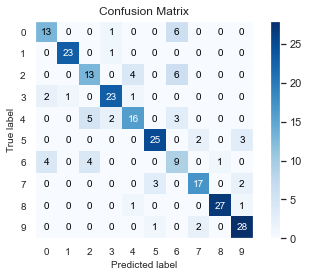

In [17]:
skplt.metrics.plot_confusion_matrix(y_test, y_predict)

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
df = pd.read_csv(zpf.open('fashion-mnist_test.csv'))
df = df.sample(frac=0.1)
df.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
4970,6,0,0,0,0,0,0,1,2,0,...,156,167,131,0,0,0,0,0,0,0
4349,3,0,0,0,0,0,0,0,0,0,...,136,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(),
                    PCA(n_components=0.9),
                    SGDClassifier(max_iter=1000, loss= 'log', tol=1e-3)) # default 'hinge'는 predic_prba() 에러

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [22]:
gs = RandomizedSearchCV(clf, param_grid, cv = kf) 
gs.fit(X_train, y_train)
y_predict = gs.predict(X_test)
y_probas = gs.predict_proba(X_test)

C:\Users\NFSI291\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('pca', PCA(n_components=0.9)),
                                             ('sgdclassifier',
                                              SGDClassifier(loss='log'))]),
                   param_distributions={})

C:\Users\NFSI291\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:327: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


In [23]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.96      1.00      0.98        26
           2       0.81      0.85      0.83        34
           3       0.78      0.90      0.84        20
           4       0.75      0.62      0.68        29
           5       0.89      0.57      0.70        28
           6       0.43      0.48      0.45        21
           7       0.63      0.79      0.70        28
           8       0.95      1.00      0.97        19
           9       0.85      0.92      0.88        24

    accuracy                           0.78       250
   macro avg       0.79      0.79      0.78       250
weighted avg       0.79      0.78      0.78       250



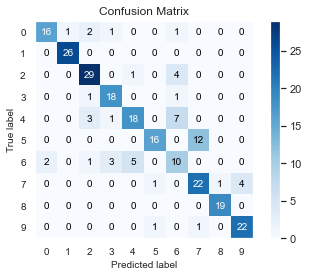

In [24]:
skplt.metrics.plot_confusion_matrix(y_test, y_predict)

# END